In [ ]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np

In [ ]:
# Caminho para o arquivo original
original_file_path = "sample_data/insurance.csv"

In [ ]:
# Carregar o arquivo CSV original para um DataFrame do pandas
df_original = pd.read_csv(original_file_path)

In [ ]:
# Verificar o número de linhas original
original_rows = len(df_original)
print(f"Número de linhas original: {original_rows}")

Número de linhas original: 1338


In [ ]:
# Definir o número alvo de linhas
target_rows = 9000

In [ ]:
# Calcular quantas linhas precisam ser geradas
rows_to_generate = target_rows - original_rows
print(f"Número de linhas a gerar: {rows_to_generate}")

Número de linhas a gerar: 7662


In [ ]:
# Verificar se a geração é necessária
if rows_to_generate > 0:

    # Manter as distribuições e correlações gerais dos dados.
    # Escolhemos aleatoriamente índices do DataFrame original, permitindo repetições.
    sampled_indices = np.random.choice(df_original.index, size=rows_to_generate, replace=True)

    # Criar um novo DataFrame (`df_generated`) contendo as linhas amostradas
    df_generated = df_original.loc[sampled_indices].copy()

    # Para tornar os dados gerados um pouco diferentes dos originais,
    # adicionamos um pequeno "ruído" aleatório às colunas numéricas.

    # Ruído para 'age' (idade):
    # Adiciona -1, 0 ou 1 à idade original.
    # Garante que a idade mínima seja 18 (baseado no mínimo do dataset original).
    age_noise = np.random.randint(-1, 2, size=rows_to_generate)
    df_generated['age'] = np.maximum(18, df_generated['age'] + age_noise)

    # Ruído para 'bmi' (IMC):
    # Adiciona um pequeno valor aleatório baseado na distribuição normal,
    # com desvio padrão igual a 5% do desvio padrão original do IMC.
    # Garante que o IMC fique dentro dos limites mínimo e máximo originais.
    bmi_std_dev = df_original['bmi'].std()
    bmi_noise = np.random.normal(0, bmi_std_dev * 0.05, size=rows_to_generate)
    bmi_min = df_original['bmi'].min()
    bmi_max = df_original['bmi'].max()
    df_generated['bmi'] = np.clip(df_generated['bmi'] + bmi_noise, bmi_min, bmi_max)

    # Ruído para 'charges' (encargos):
    # Adiciona ruído baseado na distribuição normal (10% do desvio padrão original).
    # Garante que os encargos não sejam negativos (ou menores que o mínimo original).
    charges_std_dev = df_original['charges'].std()
    charges_noise = np.random.normal(0, charges_std_dev * 0.1, size=rows_to_generate)
    charges_min = df_original['charges'].min()
    df_generated['charges'] = np.maximum(charges_min, df_generated['charges'] + charges_noise)

    # Colunas categóricas ('sex', 'children', 'smoker', 'region') são mantidas
    # como vieram da amostragem, preservando suas distribuições originais.

    # Resetar o índice do DataFrame gerado para evitar duplicatas ao concatenar
    df_generated.reset_index(drop=True, inplace=True)

    # Combinar o DataFrame original com o DataFrame gerado
    df_final = pd.concat([df_original, df_generated], ignore_index=True)

    # Garantir que o DataFrame final tenha exatamente 9000 linhas
    # (Pode haver pequenas variações devido ao arredondamento ou lógica anterior)
    if len(df_final) > target_rows:
        df_final = df_final.iloc[:target_rows]
    elif len(df_final) < target_rows:
        # Se faltarem linhas, gera mais algumas amostrando do original (sem ruído aqui por simplicidade)
        print(f"Ajustando: Faltam {target_rows - len(df_final)} linhas.")
        additional_rows_needed = target_rows - len(df_final)
        additional_indices = np.random.choice(df_original.index, size=additional_rows_needed, replace=True)
        df_additional = df_original.loc[additional_indices].copy()
        df_final = pd.concat([df_final, df_additional], ignore_index=True)

    print(f"Número final de linhas: {len(df_final)}")

else:
    print("O número alvo de linhas não é maior que o original. Nenhuma geração necessária.")
    df_final = df_original.copy()

Número final de linhas: 9000


In [ ]:
# Caminho para salvar o arquivo expandido
output_expanded_file_path = "sample_data/insurance_expanded.csv"

In [ ]:
# Salvar o DataFrame final em um novo arquivo CSV, sem o índice
df_final.to_csv(output_expanded_file_path, index=False)

print(f"Arquivo CSV expandido salvo em: {output_expanded_file_path}")

Arquivo CSV expandido salvo em: sample_data/insurance_expanded.csv


In [ ]:
# Caminho do arquivo expandido
input_file = output_expanded_file_path

In [ ]:
# Caminho para salvar o arquivo traduzido
output_translated_file_path = "sample_data/insurance_expanded_translated.csv"

In [ ]:
# Dicionário para traduzir os nomes das colunas
column_translation = {
    'age': 'idade',
    'sex': 'sexo',
    'bmi': 'imc',
    'children': 'filhos',
    'smoker': 'fumante',
    'region': 'regiao',
    'charges': 'encargos'
}

# Dicionário para traduzir valores específicos
value_translation = {
    'female': 'feminino',
    'male': 'masculino',
    'yes': 'sim',
    'no': 'nao',
    'southwest': 'sudoeste',
    'southeast': 'sudeste',
    'northwest': 'noroeste',
    'northeast': 'nordeste'
}

In [ ]:
# Carregar o arquivo CSV expandido
df_to_translate = pd.read_csv(input_file)
print("Arquivo expandido carregado para tradução.")

Arquivo expandido carregado para tradução.


In [ ]:
# Renomear as colunas usando o dicionário `column_translation`
df_to_translate.rename(columns=column_translation, inplace=True)
print("Nomes das colunas traduzidos.")

Nomes das colunas traduzidos.


In [ ]:
# Definir as colunas onde os valores precisam ser traduzidos
columns_to_translate_values = ['sexo', 'fumante', 'regiao']

# Iterar sobre essas colunas e aplicar a tradução de valores
for col in columns_to_translate_values:
    if col in df_to_translate.columns: # Verifica se a coluna (já traduzida) existe
        df_to_translate[col] = df_to_translate[col].replace(value_translation)
        # Corrigido: Fechar a string e incluir a variável 'col'
        print(f"Valores na coluna '{col}' traduzidos.")

Valores na coluna 'sexo' traduzidos.
Valores na coluna 'fumante' traduzidos.
Valores na coluna 'regiao' traduzidos.


In [ ]:
# Salvar o DataFrame traduzido em um novo arquivo CSV
df_to_translate.to_csv(output_translated_file_path, index=False)

print(f"Arquivo CSV traduzido salvo em: {output_translated_file_path}")

Arquivo CSV traduzido salvo em: sample_data/insurance_expanded_translated.csv


In [ ]:
# Mostrar as primeiras linhas do DataFrame traduzido para verificação
print("\nPrimeiras linhas do arquivo traduzido:")
print(df_to_translate.head())


Primeiras linhas do arquivo traduzido:
   idade       sexo     imc  filhos fumante    regiao     encargos
0     19   feminino  27.900       0     sim  sudoeste  16884.92400
1     18  masculino  33.770       1     nao   sudeste   1725.55230
2     28  masculino  33.000       3     nao   sudeste   4449.46200
3     33  masculino  22.705       0     nao  noroeste  21984.47061
4     32  masculino  28.880       0     nao  noroeste   3866.85520


In [ ]:
# Importando os dados
dataset = pd.read_csv("sample_data/insurance_expanded_translated.csv")

dataset.head()

,idade,sexo,imc,filhos,fumante,regiao,encargos
0,19,feminino,27.900,0,sim,sudoeste,16884.92400
1,18,masculino,33.770,1,nao,sudeste,1725.55230
2,28,masculino,33.000,3,nao,sudeste,4449.46200
3,33,masculino,22.705,0,nao,noroeste,21984.47061
4,32,masculino,28.880,0,nao,noroeste,3866.85520


In [ ]:
# Deixar todas as saídas com os mesmos valores
import numpy as np
import os

np.random.seed(42)

In [ ]:
# Plots
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
# Conhecendo os dados
dataset.shape

(9000, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     9000 non-null   int64  
 1   sexo      9000 non-null   object 
 2   imc       9000 non-null   float64
 3   filhos    9000 non-null   int64  
 4   fumante   9000 non-null   object 
 5   regiao    9000 non-null   object 
 6   encargos  9000 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 492.3+ KB


In [ ]:
set(dataset["regiao"])

{'nordeste', 'noroeste', 'sudeste', 'sudoeste'}

In [ ]:
dataset["regiao"].value_counts()

,count
regiao,
sudeste,2410
nordeste,2225
sudoeste,2187
noroeste,2178


In [ ]:
dataset.describe()

,idade,imc,filhos,encargos
count,9000.000000,9000.000000,9000.000000,9000.000000
mean,39.205778,30.535826,1.077000,13141.858769
std,14.126738,6.005063,1.200513,12038.686235
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.214513,0.000000,4721.932320
50%,39.000000,30.327721,1.000000,9412.351826
75%,51.000000,34.488003,2.000000,16101.506924
max,65.000000,53.130000,5.000000,66315.287307


In [ ]:
# Ajustando valores para duas casas decimais
dataset['imc'] = dataset['imc'].round(2)
dataset['encargos'] = dataset['encargos'].round(2)

array([[<Axes: title={'center': 'idade'}>,
        <Axes: title={'center': 'imc'}>],
       [<Axes: title={'center': 'filhos'}>,
        <Axes: title={'center': 'encargos'}>]], dtype=object)

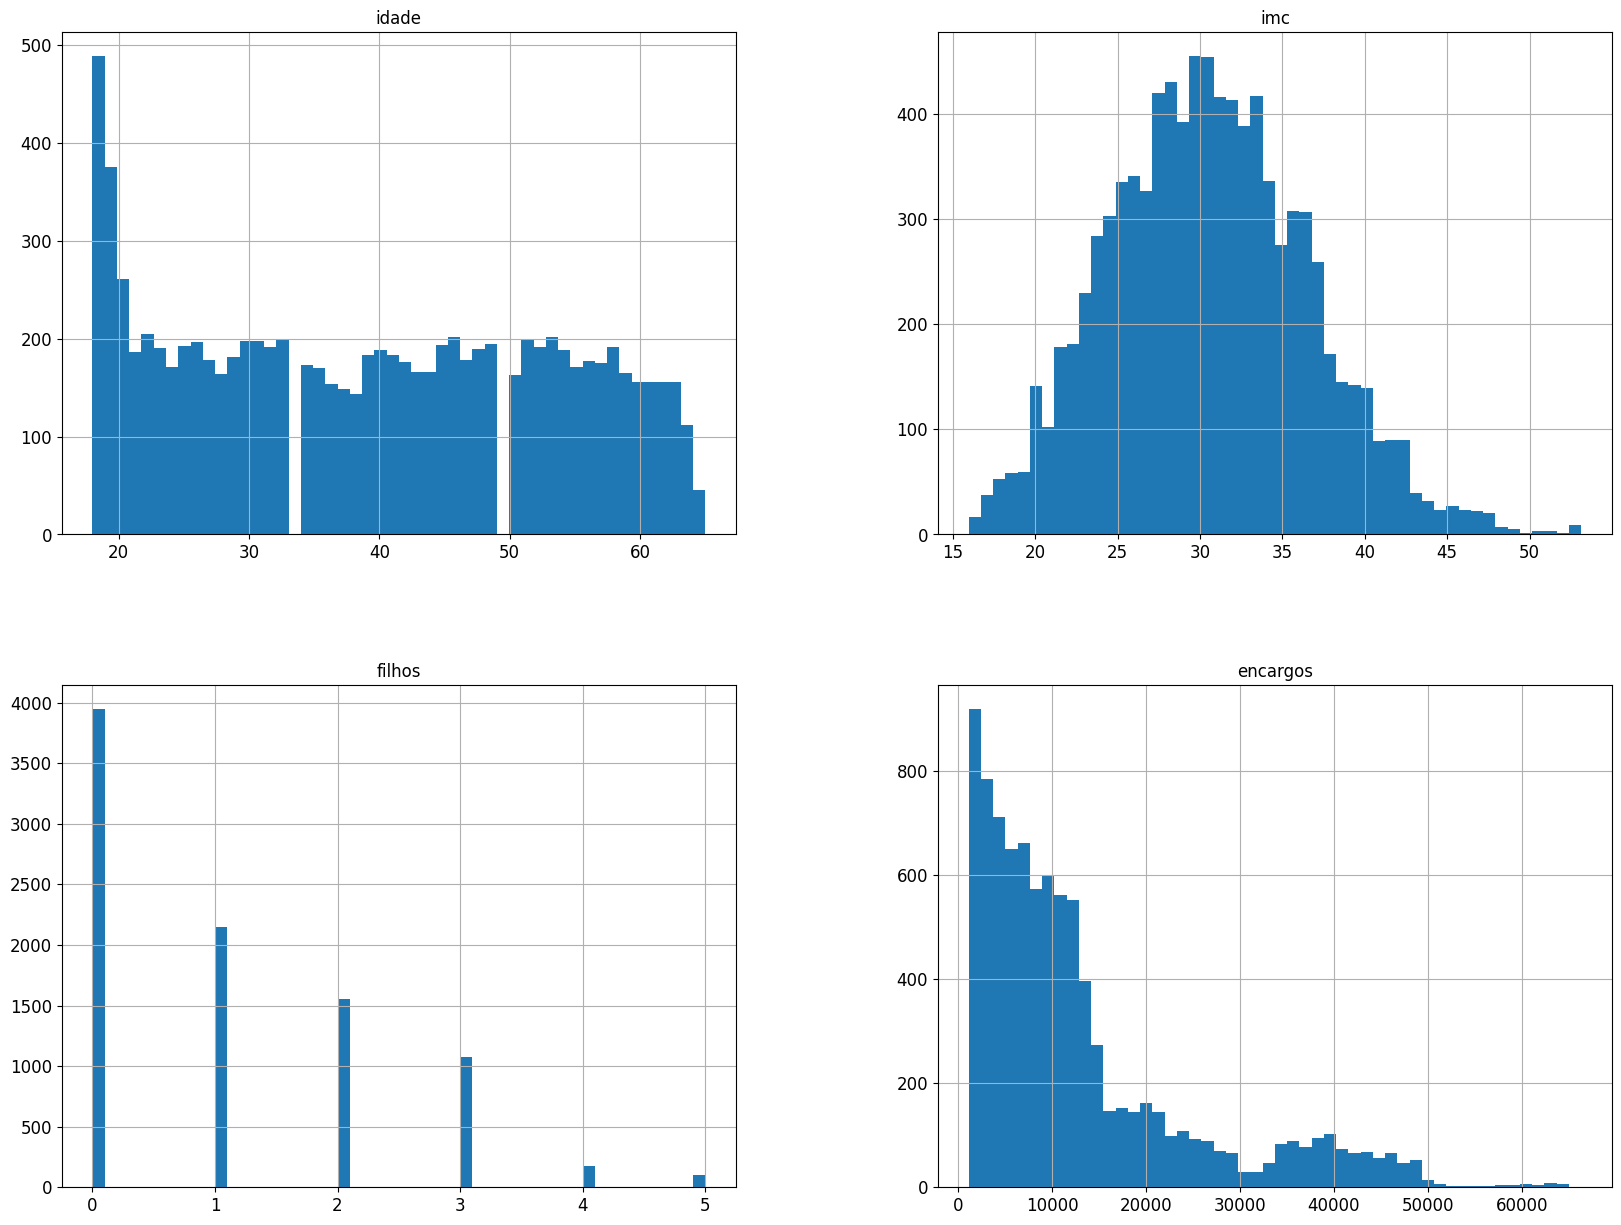

In [ ]:
dataset.hist(bins=50, figsize=(20,15))

In [ ]:
# Transformando sexo e fumante em binário
dataset["sexo"] = dataset["sexo"].map({"feminino": 0, "masculino": 1})
dataset["fumante"] = dataset["fumante"].map({"nao": 0, "sim": 1})

In [ ]:
# Transformando regiao em OneHotEnconding e dropando coluna original e concatenando com DataSet original
regiao_dummies = pd.get_dummies(dataset["regiao"], prefix="regiao")
dataset = pd.concat([dataset.drop('regiao', axis=1), regiao_dummies], axis=1)

In [ ]:
dataset["regiao_nordeste"] = dataset["regiao_nordeste"].map({False: 0, True: 1})
dataset["regiao_noroeste"] = dataset["regiao_noroeste"].map({False: 0, True: 1})
dataset["regiao_sudeste"] = dataset["regiao_sudeste"].map({False: 0, True: 1})
dataset["regiao_sudoeste"] = dataset["regiao_sudoeste"].map({False: 0, True: 1})

In [ ]:
dataset.head()

,idade,sexo,imc,filhos,fumante,encargos,regiao_nordeste,regiao_noroeste,regiao_sudeste,regiao_sudoeste
0,19,0,27.90,0,1,16884.92,0,0,0,1
1,18,1,33.77,1,0,1725.55,0,0,1,0
2,28,1,33.00,3,0,4449.46,0,0,1,0
3,33,1,22.70,0,0,21984.47,0,1,0,0
4,32,1,28.88,0,0,3866.86,0,1,0,0


<Axes: >

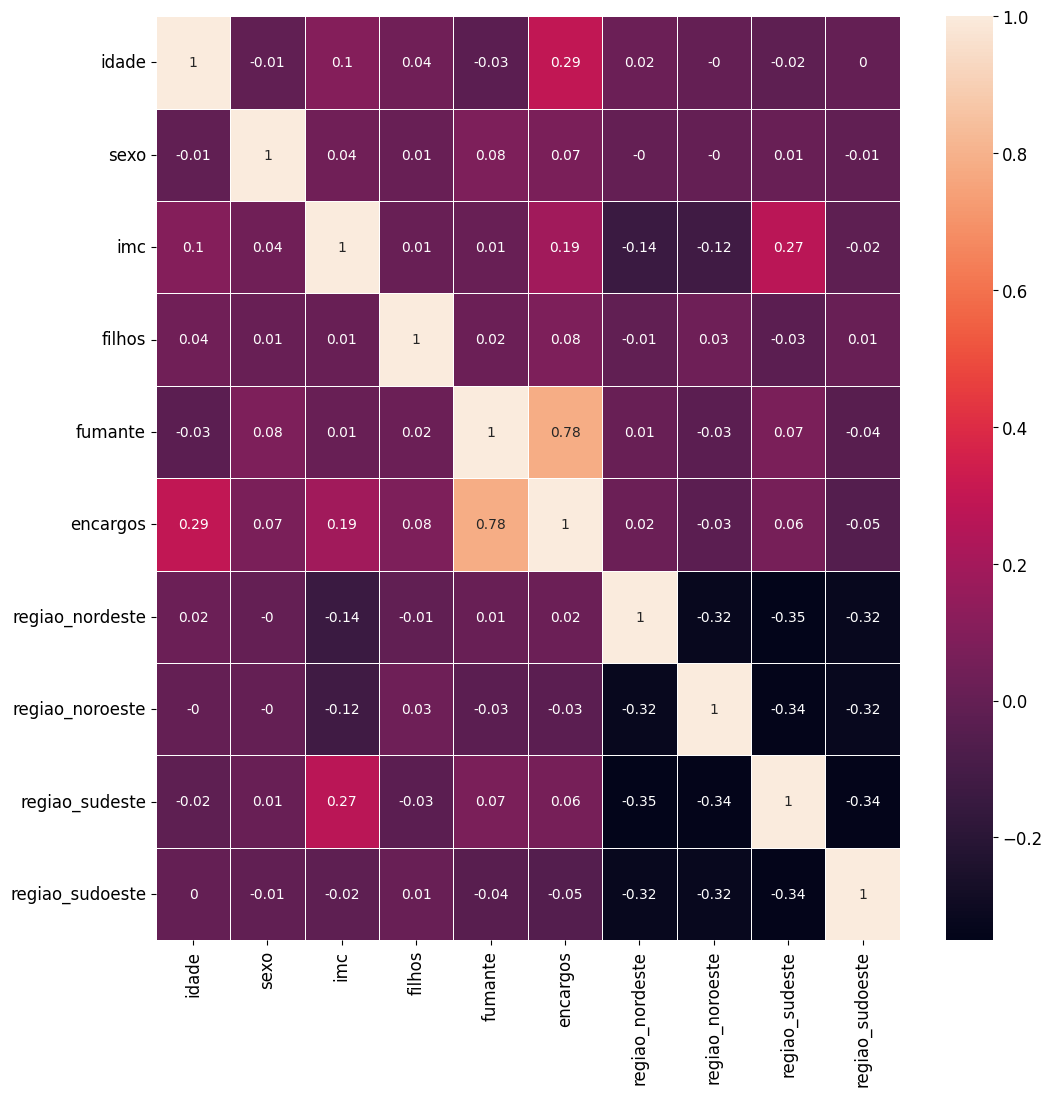

In [ ]:
#Correlação
import seaborn as sb

correlation_matrix = dataset.corr().round(2)
fig, ax = plt.subplots(figsize=(12,12))
sb.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

R²: 0.7257
RMSE: 6282.76


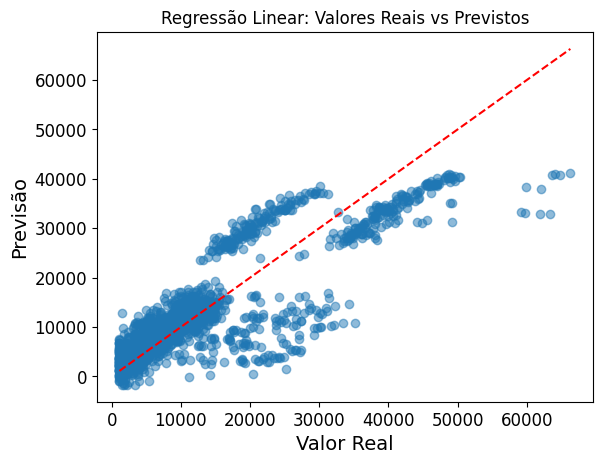

In [ ]:
# Separando Teste e Treino e Aplicando Regressão Linear
from sklearn.model_selection import train_test_split as holdout
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error

x = dataset.drop(['encargos'], axis = 1)
y = dataset['encargos']
x_train, x_test, y_train, y_test = holdout(x, y, test_size=0.2, random_state=7)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred_lr = lr.predict(x_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print(f"R²: {r2_lr:.4f}")
print(f"RMSE: {rmse_lr:.2f}")

plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Valor Real')
plt.ylabel('Previsão')
plt.title('Regressão Linear: Valores Reais vs Previstos')
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm
from scipy import stats

X_train_sm = sm.add_constant(x_train)
X_test_sm = sm.add_constant(x_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()

print("Coeficientes e P-values do Modelo de Regressão Linear:")
print(model_sm.pvalues)
print("\n")
print("Intervalos de Confiança (95%) para Coeficientes da Regressão Linear:")
print(model_sm.conf_int(alpha=0.05))

Coeficientes e P-values do Modelo de Regressão Linear:
const              7.065896e-172
idade               0.000000e+00
sexo                8.962475e-01
imc                2.991632e-153
filhos              5.754439e-12
fumante             0.000000e+00
regiao_nordeste     2.975677e-38
regiao_noroeste     1.187652e-50
regiao_sudeste      1.197772e-70
regiao_sudoeste     5.365895e-69
dtype: float64


Intervalos de Confiança (95%) para Coeficientes da Regressão Linear:
                            0             1
const           -10465.914670  -9128.705608
idade              240.880273    261.076009
sexo              -265.200300    302.999572
imc                315.614549    364.988483
filhos             297.280091    533.361424
fumante          23576.972294  24292.230912
regiao_nordeste  -2173.773821  -1604.400187
regiao_noroeste  -2498.092643  -1923.537401
regiao_sudeste   -3330.774332  -2675.493748
regiao_sudoeste  -2991.889652  -2396.658494


R²: 0.9495
RMSE: 2695.40


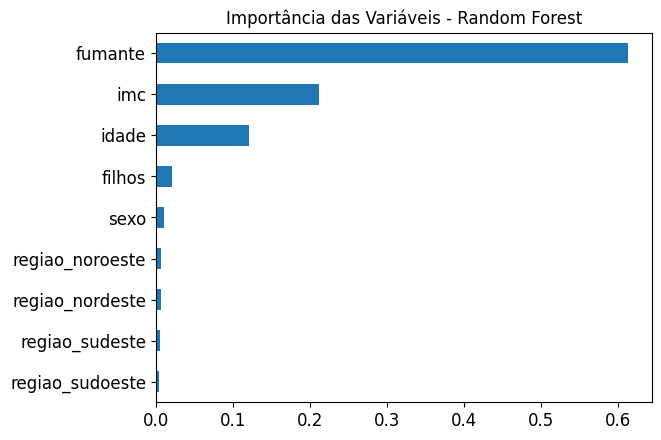

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

y_pred_rf = rf.predict(x_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print(f"R²: {r2_rf:.4f}")
print(f"RMSE: {rmse_rf:.2f}")

rf_importances = pd.Series(rf.feature_importances_, index=x.columns)
rf_importances.sort_values().plot(kind='barh')
plt.title('Importância das Variáveis - Random Forest')
plt.show()

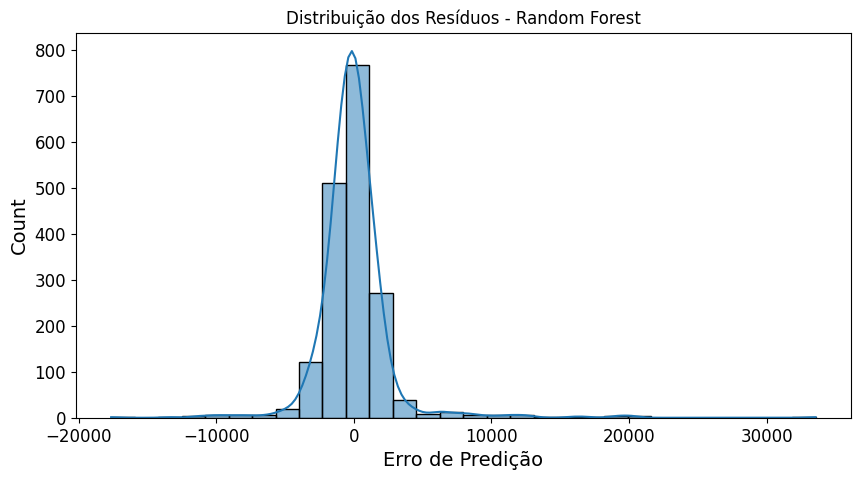

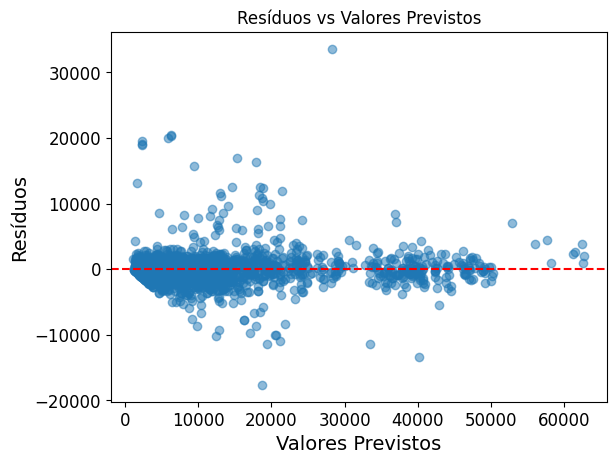

In [ ]:
# Análise de Resíduos

# Calcular resíduos
residuos_rf = y_test - y_pred_rf

# Plotar distribuição
plt.figure(figsize=(10, 5))
sb.histplot(residuos_rf, kde=True, bins=30)
plt.title('Distribuição dos Resíduos - Random Forest')
plt.xlabel('Erro de Predição')
plt.show()

print("\n")

# Plotar resíduos vs valores previstos
plt.scatter(y_pred_rf, residuos_rf, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Resíduos vs Valores Previstos')
plt.xlabel('Valores Previstos')
plt.ylabel('Resíduos')
plt.show()

In [ ]:
# Comparação entre os modelos

compare = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'Random Forest'],
    'R²': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf]
})

print("Comparação entre os modelos:")
print("\n")
print(compare.sort_values(by='R²', ascending=False))

Comparação entre os modelos:


             Modelo        R²         RMSE
1     Random Forest  0.949522  2695.398061
0  Regressão Linear  0.725745  6282.756294
